# Python Coursework Problem

 Mohit Khushlani
 

Q1
(a) Write a function to generate an m+1 dimensional data set, of size n, consisting of m
continuous independent variables (X) and one dependent variable (Y) defined as

yi = xiβ + e


where

● e is a Gaussian distribution with mean 0 and standard deviation (σ), representing the
unexplained variation in Y

● β is a random vector of dimensionality m + 1, representing the
coefficients of the linear relationship between X and Y, and
∀i ∈ [1, n], xi0 = 1

The function should take the following parameters:

• σ: The spread of noise in the output variable
• n: The size of the data set
• m: number of independent variables
Output from the function should be:
• X: An n × m+1 numpy array of independent variable values (with a 1 in the first
column)
• Y: The n × 1 numpy array of output values
• β: The random coefficients used to generate Y from X



(b) Write a function that learns the parameters of a linear regression line given inputs

• X: An n × m numpy array of independent variable values
• Y : The n × 1 numpy array of output values
• k: the number of interactions (epochs)
• τ : the threshold on change in Cost function value from the previous to current
iteration
• λ: the learning rate for Gradient Descent

The function should implement the Gradient Descent algorithm that initializes β with
random values and then updates these values in each interaction by moving in the direction
defined by the partial derivative of the cost function with respect to each of the coefficients.
The function should use only one loop that ends after a number of iterations (k) or a
threshold on the change in cost function value (τ ).
The output should be an m + 1 dimensional vector of coefficients and the final cost function
value.

In [128]:
# Making the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

In [129]:
def generator(n,m,sigma):
    """
    This function helps in generating data for Linear regression problem.
    
    To generate the data we are using the following equation.
                              y = XB + e
          here, 
          e is a Gaussuan distribution with mean 0 and standard deviation (σ), 
          representing the unexplained variation in Y.

          β is a random vector of dimensionality (m+1), representing the coefficients
          of the linear relationship between X and Y, 

          and  ∀i ∈ [1, n], Xi0 = 1
    
    Parameters:
           n: The size of the data set
           m: The number of indepedent variables
           sigma: The spread of noise in the output variable
    
    Return:
           X: An n × (m+1) numpy array of independent variable values (with a 1 in the first column)
           y : The n × 1 numpy array of output values
           beta: The random coefficients used to generatre Y from X
    """
    X = np.random.rand(n, m+1)
    X[:, 0] = 1
    print("X shape: ", X.shape)

    e = np.random.normal(0, sigma, (n,1)) # gaussian distribution
    print("error shape: ", e.shape)
    
    beta = np.random.rand(m+1, 1)
    print("beta shape: ", beta.shape)
    
    y = np.matmul(X, beta) + e
    print("y shape: ", y.shape)
    return X,y,beta

In [130]:
X, y, beta = generator(1000, 1, 0.2)

X shape:  (1000, 2)
error shape:  (1000, 1)
beta shape:  (2, 1)
y shape:  (1000, 1)


In [131]:
data = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1]})
data

,X0,X1
0,1.0,0.379319
1,1.0,0.075781
2,1.0,0.847121
3,1.0,0.678669
4,1.0,0.962286
...,...,...
995,1.0,0.311981
996,1.0,0.682995
997,1.0,0.943975
998,1.0,0.760517


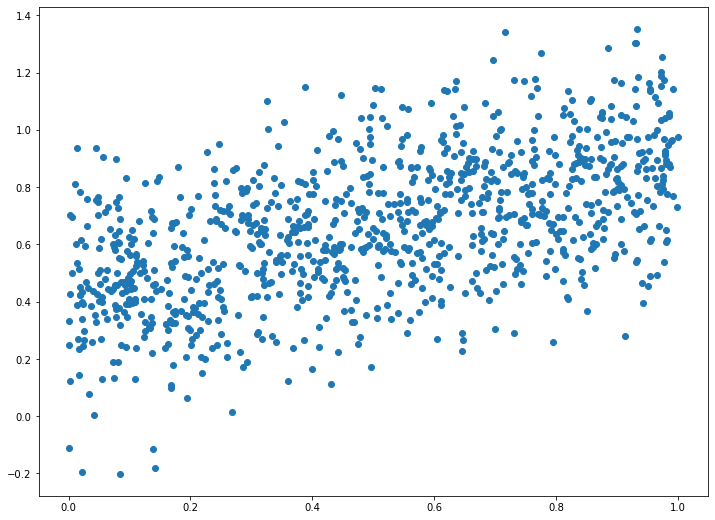

In [132]:
plt.scatter(data["X1"], y)
plt.show()

## Defining the cost function

In linear regression we generally use the **mean square error (MSE)** which is defined as shown below.

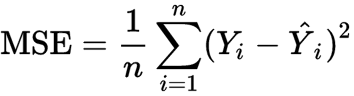



In [133]:
def mean_square_error(pred_y, y, n):
    """
    This function calculates the mean square error.

    Parameters:
    pred_y = predicted outcome
    y = actual outcome
    n = number of training examples (size of dataset)
    """

    cost = (1/(n)) * np.sum((y - pred_y)**2)
    return cost

## defining the Gradient of Mean Square Error (MSE)



In [134]:
def gradient(X, y, pred_y, n):
    """
    This function calculates the gradient of the Mean Square cost function,

    Parameters:
      X: input data
      y: actual outcome
      pred_y: predicted outcome
      n: size of dataset
    """
    gradient = (-2/n) * np.matmul(X.T, (y - pred_y))
    # print("gradient: ", gradient.shape)
    return gradient

In [135]:
def regression(x, y, epochs, threshold):
    """
    This function implements the gradient descent algorithm for linear regression.

    Parameters:
    x: input data
    y: actual outcome
    """
    learning_rate = 0.001
    # x.shape = (n, m)
    n = x.shape[0]
    m = x.shape[1]

    weight = np.random.rand(m, 1) * learning_rate

    pre_cost = float('inf') #initial cost

    for i in range(epochs):
      # y = x*beta
        pred_y = np.matmul(x, weight)
        cost = mean_square_error(pred_y, y, n)
        if i == 0:
          print("Cost at epoch - 1: ", cost)
        if abs(pre_cost - cost) <= threshold:
            print("threshold reached at epoch: ", i)
            break

        pre_cost = cost  #updating the cost value

        gd = gradient(x, y, pred_y, n)# finding gradient
        
        weight = weight - learning_rate * gd # updating weights
        # value = value - LR*gradient
        # print("weight shape: ", weight.shape)
    return pre_cost, weight

In [136]:
X, y, beta = generator(500, 5, 0.2)
final_cost , weight = regression(X, y, 200, 0.0002)
print("Final cost: ", final_cost)

X shape:  (500, 6)
error shape:  (500, 1)
beta shape:  (6, 1)
y shape:  (500, 1)
Cost at epoch - 1:  4.072668127287506
Final cost:  0.7149381870337178


In [137]:
print(weight.shape)

(6, 1)


In [138]:
beta


array([[0.53488163],
       [0.33915881],
       [0.86759236],
       [0.30290331],
       [0.41053805],
       [0.94922501]])

In [139]:
weight

array([[0.51591852],
       [0.25661205],
       [0.28607092],
       [0.25311116],
       [0.2675693 ],
       [0.28771961]])

Q2. 
Let’s say you are at the bottom of a staircase with a die. With each throw of the die, you
either move down one step (if you get a 1 or 2 on the dice) or move up one step (if you get a
3, 4, or 5 on the dice). If you throw a 6 on the die, you throw the die again and move up the
staircase by the number you get on that second throw. Note if you are at the base of the
staircase, you cannot move down! What is the probability that you will reach higher than the
200th step after 250 throws of the die?

Change the code so that you have a function that takes as a parameter, the number of
throws. The function has another parameter that takes a probability distribution over all
outcomes from a dice throw. For example (0.2,0.3,0.2,0.1,0.1,0.1) would suggest that the
probability of getting a 1 is 0.2, 2 is 0.3 etc. Calculate the probability of reaching a step
higher than the 200th one for the following cases:
    
(a) Number of throws: 100 throws, distribution=(0.2,0.2,0.2,0.2,0.1,0.1)
    
(b) Number of throws: 200 throws, distribution=(0.1,0.01,0.01,0.08, 0.4,0.4)
    
(c) Number of throws: 40 throws, distribution=(0.3,0.01,0.01,0.01,0.01,0.66)
    
(d) Number of throws: 1000 throws, distribution=(0.17,0.17,0.17,0.16,0.16,0.17)
    
Special Notes: Assume that the base of the staircase is numbered as step 0. You cannot use
numpy. Only library that can be imported for this question is random.

In [201]:
import random

def rolldice(T:int, D): #T = throws, D = distribution in format [0.0,0.0,0.0,0.0,0.0,1] [0.2,0.2,0.2,0.2,0.1,0.1]
  Stair = 0

  for i in range(T):
    #print(i,Stair)
    roll = random.choices([1,2,3,4,5,6], weights= D)
    roll2 = random.choices([1,2,3,4,5,6])
    roll1 = roll[0]
    if roll[0] == 1 and Stair > 0:
     Stair -= 1
    elif roll[0] == 2 and Stair > 0:
     Stair -= 1
    elif roll[0] == 3:
     Stair += 1
    elif roll[0] == 4:
     Stair += 1
    elif roll[0] == 5:
     Stair += 1
    elif roll[0] == 6:
     Stair += roll2[0]

  return Stair
  
#this function will return on which stair we are.....after rolling dice for given number of times
#and with given probability

In [202]:
rolldice(100, [0.2,0.2,0.2,0.2,0.1,0.1])

26

In [203]:
rolldice(200, [0.2,0.2,0.2,0.2,0.1,0.1])

76

In [204]:
rolldice(40, [0.2,0.2,0.2,0.2,0.1,0.1])

5

In [205]:
rolldice(1000, [0.2,0.2,0.2,0.2,0.1,0.1])

431

In [206]:
#Now performing given task for let say X times what is the probability that we are on 
#staircase above 200 

# so that will be Number of times we get to stair above 200 ( favourable outcomes) divided by
# number of task performed which is X 
# and here task is to get to a staircase after rolling the dice for given number of times and 
#with given probability

c=0
for i in range (10):# here I have considered X to be 10 bcz if I'm taking larger number My system is crashing ideally it should be infinite
    
    if (rolldice(100, [0.2,0.2,0.2,0.2,0.1,0.1])>200):
        c+=1
print(c)

# c will be number of times we are getting to staircase above 200 for performing the task for X(=10) number of times 
#Probability will be c/x

0


Q3. Write a program to replace the following list of key phrases with underscore in between
them in given text:

list_of_keyphrases = ['Prince Charles', 'Prince William', 'Meghan Markle', 'United
Kingdom', 'North America', 'Duke and Duchess of Sussex', 'Queen Elizabeth II']

text = 'On January 8, Prince Harry and Meghan Markle, the Duke and Duchess of Sussex,
unveiled their controversial plan to walk away from royal roles. We intend to step back as
‘senior’ members of the royal family and work to become financially independent while
continuing to fully support her majesty the queen, they said in a joint statement. We now
plan to balance our time between the United Kingdom and North America, continuing to
honor our duty to the Queen, the commonwealth and our patronages. This geographic
balance will enable us to raise our son with an appreciation for the royal tradition into which
he was born, while also providing our family with the space to focus on the next chapter,
including the launch of our new charitable entity, the statement added. Apparently, the
announcement on the Sussex Royal Instagram page blindsided the Queen and other family
members who had no idea it was coming, it sent tabloids into overdrive. Meanwhile, the
Queen summoned Senior Royals to an emergency summit to discuss the future of the Duke
and Duchess of Sussex. Billed as the Sandringham summit, the meeting took place at the
Queen's estate in Norfolk and involved Queen Elizabeth II, Harry his father, Prince Charles
and his brother Prince William, with Meghan Markle reportedly joining the discussions by
phone from Canada. Soon after, the queen released a statement, that said, My family and I
are entirely supportive of Harry and Meghan Markle desire to create a new life as a young
family. Although we would have preferred them to remain full-time working members of
the Royal family, we respect and understand their wish to live a more independent life as a
family while remaining a valued part of my family.'

In [140]:
list_of_keyphrases = ['Prince Charles', 'Prince William', 'Meghan Markle', 'UnitedKingdom', 'North America', 'Duke and Duchess of Sussex', 'Queen Elizabeth II']
                      

In [141]:
text = "On January 8, Prince Harry and Meghan Markle, the Duke and Duchess of Sussex,unveiled their controversial plan to walk away from royal roles. We intend to step back as‘senior’ members of the royal family and work to become financially independent whilecontinuing to fully support her majesty the queen, they said in a joint statement. We nowplan to balance our time between the United Kingdom and North America, continuing tohonor our duty to the Queen, the commonwealth and our patronages. This geographicbalance will enable us to raise our son with an appreciation for the royal tradition into whichhe was born, while also providing our family with the space to focus on the next chapter,including the launch of our new charitable entity, the statement added. Apparently, theannouncement on the Sussex Royal Instagram page blindsided the Queen and other familymembers who had no idea it was coming, it sent tabloids into overdrive. Meanwhile, theQueen summoned Senior Royals to an emergency summit to discuss the future of the Dukeand Duchess of Sussex. Billed as the Sandringham summit, the meeting took place at theQueen's estate in Norfolk and involved Queen Elizabeth II, Harry his father, Prince Charlesand his brother Prince William, with Meghan Markle reportedly joining the discussions byphone from Canada. Soon after, the queen released a statement, that said, My family and Iare entirely supportive of Harry and Meghan Markle desire to create a new life as a youngfamily. Although we would have preferred them to remain full-time working members ofthe Royal family, we respect and understand their wish to live a more independent life as afamily while remaining a valued part of my family."

In [142]:
import re
for i in list_of_keyphrases:
    if i in text:
        text=text.replace(i,"_")
        
print(text)

On January 8, Prince Harry and _, the _,unveiled their controversial plan to walk away from royal roles. We intend to step back as‘senior’ members of the royal family and work to become financially independent whilecontinuing to fully support her majesty the queen, they said in a joint statement. We nowplan to balance our time between the United Kingdom and _, continuing tohonor our duty to the Queen, the commonwealth and our patronages. This geographicbalance will enable us to raise our son with an appreciation for the royal tradition into whichhe was born, while also providing our family with the space to focus on the next chapter,including the launch of our new charitable entity, the statement added. Apparently, theannouncement on the Sussex Royal Instagram page blindsided the Queen and other familymembers who had no idea it was coming, it sent tabloids into overdrive. Meanwhile, theQueen summoned Senior Royals to an emergency summit to discuss the future of the Dukeand Duchess of S

Q4. Given to you is the historical price of the Apple Stock (AAPL - AAPL - Google Sheets) on
the NASDAQ stock exchange. Let us define daily returns as:
    
    
Daily Returns= (Adjusted Close of the current day/Adjusted close of the previous day)-1


Your task is to use pandas to read the CSV file, find the daily returns, and see if the data fits any
possible probability distribution. For the same, you are encouraged to make use of plenty of
visualisation libraries and any other possible libraries you think might be useful to test your
hypothesis(claim). Post testing the same, give at least three calculations of probabilities which
show that the empirical probability is similar to the one obtained by the probability distribution
you hypothesised earlier.


In case you believe that no distribution reasonably fits the data, please explain why you think the
same and give atleast three probability calculations which illustrate that there is no similarity
between the empirical probabilities and the values obtained from the distribution.
Please illustrate your calculations and state your hypothesis within the ipynb notebook itself.
Also, comment on the final conclusions within the notebook itself.


**Solution**: we are given the data set consisting historical prices of APPLE Stock on the NASDAQ stock exchange.
we are asked to find the Daily Returns and to find wether any probability distribution fits to the data set or not. 
And approach for the same is 1st I will look at the different visualizations and then use descriptive statistics to further identify distributions and then finally I will go in for actual tests to confirm my judgment.


In [143]:
#lets look at the data first 
#for that we need to imprt certain Python Libraries ( pandas , Numpy)

import numpy as np
import pandas as pd

#now we will read the data set 

df = pd.read_excel('AAPL - AAPL.xlsx')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,14-09-2020,114.720001,115.930000,112.800003,115.360001,114.622765,140150100.0
1,15-09-2020,118.330002,118.830002,113.610001,115.540001,114.801620,184642000.0
2,16-09-2020,115.230003,116.000000,112.040001,112.129997,111.413406,154679000.0
3,17-09-2020,109.720001,112.199997,108.709999,110.339996,109.634850,178011000.0
4,18-09-2020,110.400002,110.879997,106.089996,106.839996,106.157211,287104900.0
...,...,...,...,...,...,...,...
247,2021-07-09 00:00:00,154.970001,157.259995,154.389999,156.690002,156.690002,82278300.0
248,2021-08-09 00:00:00,156.979996,157.039993,153.979996,155.110001,155.110001,74420200.0
249,2021-09-09 00:00:00,155.490005,156.110001,153.949997,154.070007,154.070007,57305700.0
250,2021-10-09 00:00:00,155.000000,155.479996,148.699997,148.970001,148.970001,140646400.0


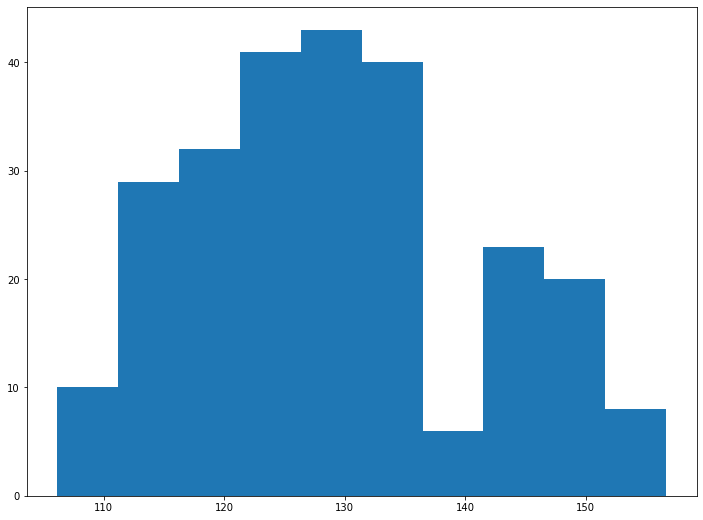

In [144]:
#we can observe we have 252 rows and 7 columns we can not say much from this  

#I will be fitting the probability distribution using the column Adj Close

#Now I will try to visualise the data set and I will plot the histogram using matplotlib

import matplotlib.pyplot as plt
plt.hist(df['Adj Close'])
plt.show()



In [145]:
#after looking at histogram we can tell probably to which family of distribution our data set belongs to 
#So, looking at this one thing that I can say is that it could be a non-Gaussian distribution 
#since there are two peaks instead of just one. 
#That is the first observation 
#but I cannot comment over its symmetry for that I have to look more graphs and  descriptive statisics


In [146]:
#Descriptive Statistics 

#for that I will be using (.describe() method)

df['Adj Close'].describe()

count    252.000000
mean     129.264839
std       11.712862
min      106.157211
25%      120.634044
50%      127.412362
75%      135.694866
max      156.690002
Name: Adj Close, dtype: float64

In [147]:
#so we can not see anything special in this Statistics so I will try to find other stats like skewness
# and kutosis
#skewness will how much our data set skewed basically it tells about the symmetry of the distibution
#while kurtosis tells about taildness of our distribution which is how often outliers exists in our data set

stats_labels = ['Mean Observed', 'Variance Observed', 'Skew Observed', 'Kurt Observed']
stats_values = [round(df['Adj Close'].mean(), 2), round(df['Adj Close'].var(), 2), round(df['Adj Close'].skew(),2), round(df['Adj Close'].kurt(),2)]
print(set(zip(stats_labels, stats_values)))

{('Skew Observed', 0.36), ('Kurt Observed', -0.65), ('Mean Observed', 129.26), ('Variance Observed', 137.19)}


In [148]:
# here we can see variance and mean are kind of close, 137 and 129 respectively.
#So, from the histogram I said it is a non-Gaussian distribution but I did not know which it could be.
# and after looking at the mean and variance and they are close to each other 
#I can think of a **Poisson distribution**
# so using histogram and Descriptive Statistics that our data set Probability distribution could be a 
#Poisson distribution
# we have kurtosis -0.65 and skewness of 0.36 which tells me that there is asymmetry,
#so, now I can eleminate certain symmetric distributions such as normal, uniform etc...


In [149]:
df['Adj Close'].median()

127.4123615

In [150]:
# here we have median 127 and mean we had 129 which are close to each other 
#which says our distribution could be symmetric so our assumption for Poisson is not fully correct
#and I have to look for more evidences for that

#Now I will look for statistical testing one of which is Chi-Squre goodness to confirm for Poisson


In [151]:
#import statsmodels.api as sm
import scipy.stats as stats

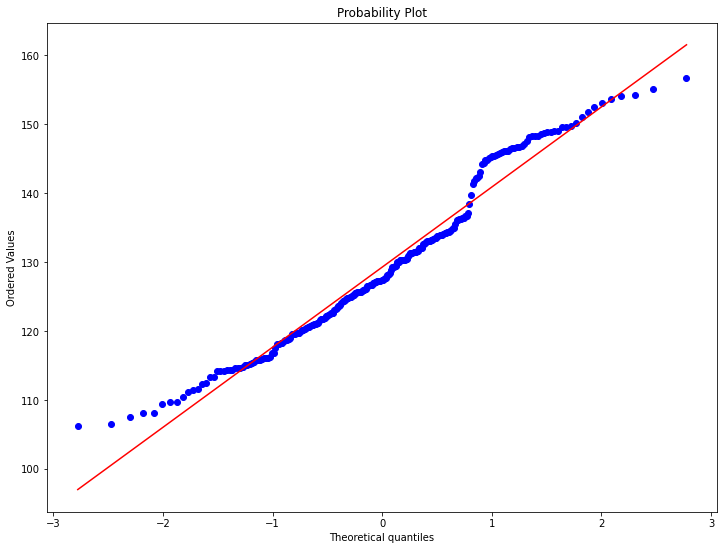

In [152]:
# Now I will look into Q-Q plot or P-P plot 
#Q-Q plot which is Quantile-quantile plot and in this we compare 2 probability distribution by plotting quantiles against eachother, 
#one is fitted (model) distribution and other is sample distribution,
#if both the distribution are similar then Q-Q plot is approximately linear

#P-P plot which Probability-Probability plot,this one is also on the similar lines with Q-Q plot 
#here graph of the model probability is plotted against the sample probability 


#P-P Plot
import matplotlib.pyplot as pltp
stats.probplot(df['Adj Close'], plot=plt)
plt.show()



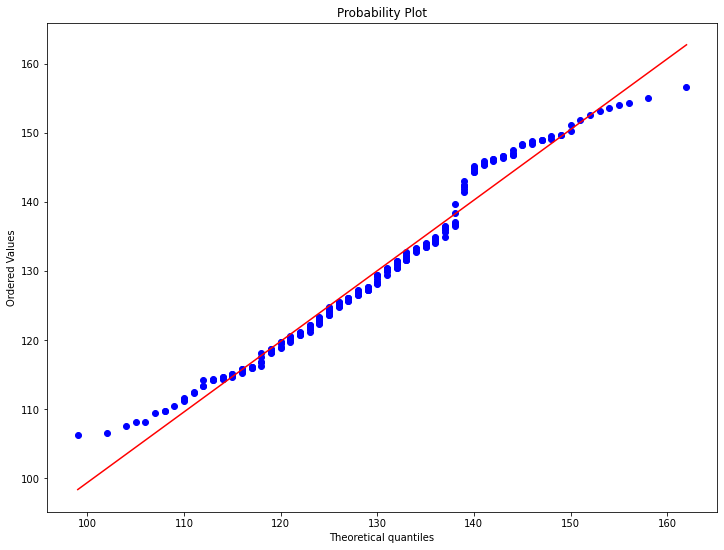

In [153]:
#by Default this P-P plot is compared with Standard normal Distribution
#therefore implicitly will try to do for Poisson

stats.probplot(df['Adj Close'], dist='poisson', sparams=(129.26,), plot=plt)
plt.show()

#here sparamsis the parameter I got from the descriptive statistics which is the mean =129.26 (lambda)

In [154]:
# Points are almost around the same line so with certain degree of certainity I can say that from which
#CDF this data is coming is Poisson with lambda 129.26


#Actually here I can not make any prediction as it is showing similarity with Poisson and Normal distribution both
#For Now I can not make any Prediction Like wich Probability Distribution fits well to this data

In [155]:
#Now I will try to Look through Statistical method which is Chi-Squared method that this is a 
#Poisson or normal or any other Probability Distribution
print(df['Adj Close'])

0      114.622765
1      114.801620
2      111.413406
3      109.634850
4      106.157211
          ...    
247    156.690002
248    155.110001
249    154.070007
250    148.970001
251    149.550003
Name: Adj Close, Length: 252, dtype: float64


In [156]:
grouped_df = pd.DataFrame()
# here I will group the data set into bins which will contain the frequency of each data. 

In [157]:
grouped_df['frequency']= df.groupby('Adj Close')['Adj Close'].count()
grouped_df

,frequency
Adj Close,
106.157211,1
106.435432,1
107.528404,1
108.074883,1
108.164307,1
...,...
153.649994,1
154.070007,1
154.300003,1


In [158]:
len(df)

252

In [159]:
grouped_df['OBS_PROBA'] = grouped_df['frequency']/len(df)
print(grouped_df)

#Here I'm trying to calculate the observed probability

            frequency  OBS_PROBA
Adj Close                       
106.157211          1   0.003968
106.435432          1   0.003968
107.528404          1   0.003968
108.074883          1   0.003968
108.164307          1   0.003968
...               ...        ...
153.649994          1   0.003968
154.070007          1   0.003968
154.300003          1   0.003968
155.110001          1   0.003968
156.690002          1   0.003968

[249 rows x 2 columns]


In [160]:
from scipy import stats
from scipy.stats import poisson
from scipy.stats import chisquare

In [161]:
poisson.pmf

<bound method rv_discrete.pmf of <scipy.stats._discrete_distns.poisson_gen object at 0x00000274CD8C1A60>>

In [162]:
grouped_df.index

Float64Index([106.157211, 106.435432, 107.528404, 108.074883, 108.164307,
              109.376511,  109.63485, 109.734207, 110.489349, 111.095444,
              ...
              150.190002, 151.119995, 151.830002, 152.509995, 153.119995,
              153.649994, 154.070007, 154.300003, 155.110001, 156.690002],
             dtype='float64', name='Adj Close', length=249)

In [163]:
df['Adj Close'].mean()

129.2648392460317

In [164]:
grouped_df['POISSON_PMF'] = poisson.pmf(k=grouped_df.index, mu=df['Adj Close'].mean())

In [165]:
df['Adj Close'].mean()

129.2648392460317

In [166]:
grouped_df['POISSON_PMF']

Adj Close
106.157211    0.0
106.435432    0.0
107.528404    0.0
108.074883    0.0
108.164307    0.0
             ... 
153.649994    0.0
154.070007    0.0
154.300003    0.0
155.110001    0.0
156.690002    0.0
Name: POISSON_PMF, Length: 249, dtype: float64

In [167]:
grouped_df

,frequency,OBS_PROBA,POISSON_PMF
Adj Close,,,
106.157211,1,0.003968,0.0
106.435432,1,0.003968,0.0
107.528404,1,0.003968,0.0
108.074883,1,0.003968,0.0
108.164307,1,0.003968,0.0
...,...,...,...
153.649994,1,0.003968,0.0
154.070007,1,0.003968,0.0
154.300003,1,0.003968,0.0


In [168]:
grouped_df['POISSON_FREQ'] = grouped_df['POISSON_PMF']*len(df)

In [169]:
grouped_df

,frequency,OBS_PROBA,POISSON_PMF,POISSON_FREQ
Adj Close,,,,
106.157211,1,0.003968,0.0,0.0
106.435432,1,0.003968,0.0,0.0
107.528404,1,0.003968,0.0,0.0
108.074883,1,0.003968,0.0,0.0
108.164307,1,0.003968,0.0,0.0
...,...,...,...,...
153.649994,1,0.003968,0.0,0.0
154.070007,1,0.003968,0.0,0.0
154.300003,1,0.003968,0.0,0.0


In [170]:
grouped_df['POISSON_FREQ'] = [round(elem,2) for elem in grouped_df['POISSON_FREQ']]

In [171]:
grouped_df

,frequency,OBS_PROBA,POISSON_PMF,POISSON_FREQ
Adj Close,,,,
106.157211,1,0.003968,0.0,0.0
106.435432,1,0.003968,0.0,0.0
107.528404,1,0.003968,0.0,0.0
108.074883,1,0.003968,0.0,0.0
108.164307,1,0.003968,0.0,0.0
...,...,...,...,...
153.649994,1,0.003968,0.0,0.0
154.070007,1,0.003968,0.0,0.0
154.300003,1,0.003968,0.0,0.0


In [172]:
obs_freq = list(grouped_df['frequency'])
expec_freq = list(grouped_df['POISSON_FREQ'])

In [189]:
# we can see from above table every data set is  equal likelihood as Observed Probability for each element is 0.003968

In [176]:
import scipy.stats

In [179]:
1/252

0.003968253968253968

In [ ]:
import scipy.stats

In [180]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,14-09-2020,114.720001,115.930000,112.800003,115.360001,114.622765,140150100.0
1,15-09-2020,118.330002,118.830002,113.610001,115.540001,114.801620,184642000.0
2,16-09-2020,115.230003,116.000000,112.040001,112.129997,111.413406,154679000.0
3,17-09-2020,109.720001,112.199997,108.709999,110.339996,109.634850,178011000.0
4,18-09-2020,110.400002,110.879997,106.089996,106.839996,106.157211,287104900.0
...,...,...,...,...,...,...,...
247,2021-07-09 00:00:00,154.970001,157.259995,154.389999,156.690002,156.690002,82278300.0
248,2021-08-09 00:00:00,156.979996,157.039993,153.979996,155.110001,155.110001,74420200.0
249,2021-09-09 00:00:00,155.490005,156.110001,153.949997,154.070007,154.070007,57305700.0
250,2021-10-09 00:00:00,155.000000,155.479996,148.699997,148.970001,148.970001,140646400.0


In [181]:
df['Adj Close']

0      114.622765
1      114.801620
2      111.413406
3      109.634850
4      106.157211
          ...    
247    156.690002
248    155.110001
249    154.070007
250    148.970001
251    149.550003
Name: Adj Close, Length: 252, dtype: float64

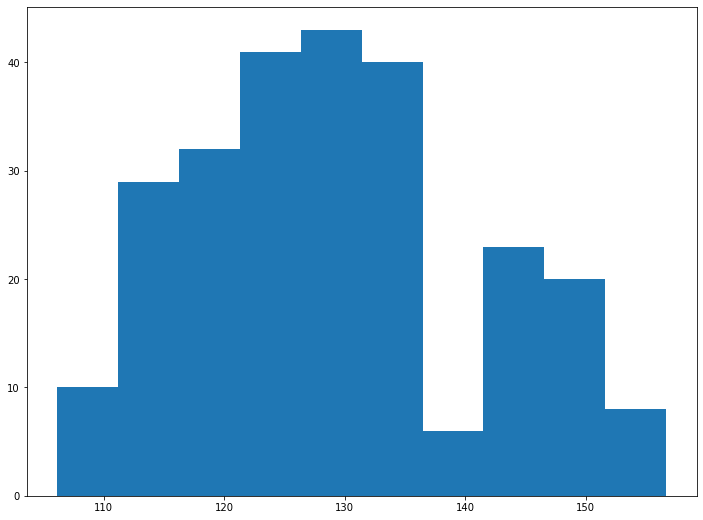

In [182]:
plt.hist(df['Adj Close'])
plt.show()

In [184]:
dist=scipy.stats.norm
bounds=[(100,150),(-12,15)]
res=scipy.stats.fit(dist,df['Adj Close'],bounds)
#scipy.stats.fit
print(res)


#Here I was trying to use scipy.stats to fit Normal distribution by giving proper bound etc 
#similarly I will try to do for other distribution also and will see Which Distribution Fits well

  params: FitParams(loc=129.26484409348728, scale=11.689595613130981)
 success: True
 message: 'Optimization terminated successfully.'


In [185]:
import scipy 
print('scipy: {}'. format(scipy. __version__)) 



scipy: 1.9.3


In [ ]:
!pip install -U scipy


In [ ]:
print('scipy: {}'. format(scipy. __version__)) 


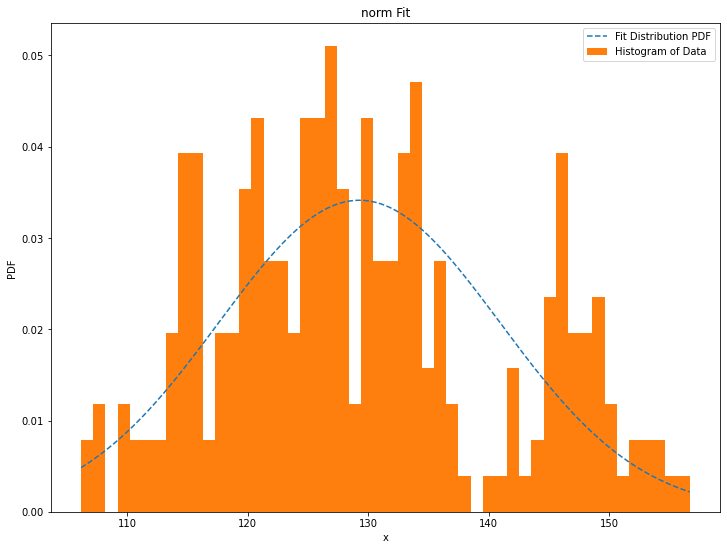

In [186]:
res.plot()
plt.show()

In [187]:
dist=scipy.stats.poisson
bounds=[(100,150)]
res=scipy.stats.fit(dist,df['Adj Close'],bounds)
#scipy.stats.fit
print(res)

  params: FitParams(mu=129.2646333376021, loc=0.0)
 success: True
 message: 'Optimization terminated successfully.'


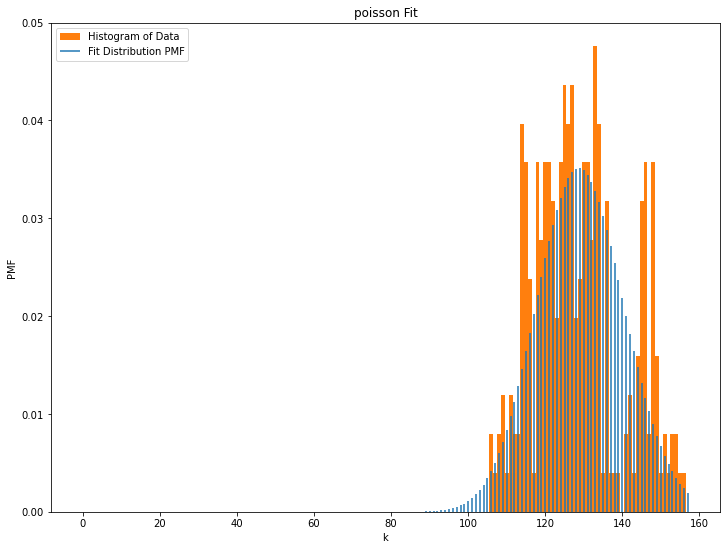

In [188]:
res.plot()
plt.show()

In [ ]:
# So I can not come to conclussion Which Probability distribution fits well to the given Data.

### Daily Returns

Daily Returns= (Adjusted Close of the current day/Adjusted close of the previous day)-1

In [ ]:
#TEST RUN

In [ ]:
## test run

In [ ]:
df['Adj Close'].shift(1)

In [ ]:
df['Adj Close']

In [ ]:
df['Adj Close']/df['Adj Close'].shift(1)-1